# Day 8 : Data Loading and Manipulation and Visulatiozation (Facies)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot well logs together with Facies column (FORCE_2020_LITHOFACIES_LITHOLOGY) as striplog (facies log)
3. How many classes in the facies log.
4. How many data points per each class.



In [1]:
#import libraries 
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization 
from pandas_profiling import ProfileReport # for reporting 

In [110]:
df = pd.read_csv('well1513.csv')

In [111]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
# Number of columns 
print(f'Number of columns =  {df.shape[1]}')

Number of columns =  29


In [5]:
# Number of observation 
print(f'Number of observation is {df.shape[0]}')

Number of observation is 18270


In [6]:
# Number of null value 
print(f'Number of Null values = {df.isnull().sum().sum()}')

Number of Null values = 152438


In [7]:
# Normal statisitcs
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,18270.000000,...,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,63.847477,...,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,28.636331,...,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,6.191506,...,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,43.866690,...,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,66.777851,...,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,81.542681,...,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,499.022583,...,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


## 2. Plot well logs together with Facies column (FORCE_2020_LITHOFACIES_LITHOLOGY) as striplog (facies log)


In [8]:
#type of facies
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    12547
30000     2937
70000     1418
65030      708
80000      429
99000      173
74000       41
86000       17
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [9]:
df.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY')['CALI','RSHA','RMED','RDEP','RHOB','GR','NPHI','PEF','DTC','SP'].sum()

C:\Users\AHMED\AppData\Local\Temp\ipykernel_3412\2470175724.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY')['CALI','RSHA','RMED','RDEP','RHOB','GR','NPHI','PEF','DTC','SP'].sum()


,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP
FORCE_2020_LITHOFACIES_LITHOLOGY,,,,,,,,,,
30000,57148.741310,1158.610592,4263.269508,5153.817731,5257.373067,102856.835333,753.491565,10423.795747,4.028878e+05,147471.011627
65000,177383.508766,987.790971,17281.976927,17665.690065,26743.008615,971905.976668,4303.329972,35216.601570,1.628933e+06,906144.558290
65030,10702.126866,92.073522,1042.986070,1112.740843,1381.094947,43739.593269,216.255984,1429.433427,9.351604e+04,47110.126938
70000,17431.570134,2397.062541,7659.740748,7189.953068,3585.716583,22931.842621,233.076733,6938.266822,9.572095e+04,124402.650135
74000,349.568042,0.000000,606.430765,490.353207,110.786362,789.413269,7.674104,0.000000,0.000000e+00,6137.625595
80000,4556.778986,73.602648,1570.629064,1309.782406,1072.430947,15947.976503,80.186065,2181.705776,3.409855e+04,46059.407425
86000,143.987020,0.000000,953.209480,406.390311,47.841863,459.134863,1.761367,0.000000,0.000000e+00,2524.620148
99000,2491.311193,0.000000,154.009408,142.638723,359.679154,7862.632387,80.827914,755.904373,2.040042e+04,12048.025383


C:\Users\AHMED\AppData\Local\Temp\ipykernel_3412\892744239.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY')['CALI','RSHA','RMED','RDEP','RHOB','GR','NPHI','PEF','DTC','SP'].sum()


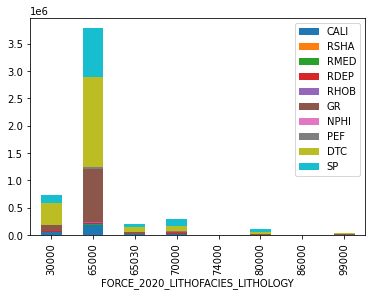

In [10]:
grouped_data = df.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY')['CALI','RSHA','RMED','RDEP','RHOB','GR','NPHI','PEF','DTC','SP'].sum()

# Plot the data
grouped_data.plot(kind='bar', stacked=True)
plt.show()

In [33]:
pip install striplog

Note: you may need to restart the kernel to use updated packages.


In [11]:
depth = df['DEPTH_MD']
lithotype = df['FORCE_2020_LITHOFACIES_LITHOLOGY']
KEY = {65000: 'A', 30000: 'B', 70000: 'C', 65030: 'D',80000:'E',99000:'F',74000:'G',86000:'H'}

In [12]:
from striplog import Striplog, Component, Interval

intervals = []
for top, base, lith in zip(depth, depth[1:], lithotype):
    comp = Component({'lithology': KEY[lith]})
    iv = Interval(top, base, components=[comp])
    intervals.append(iv)
    
s = Striplog(intervals).merge_neighbours() 

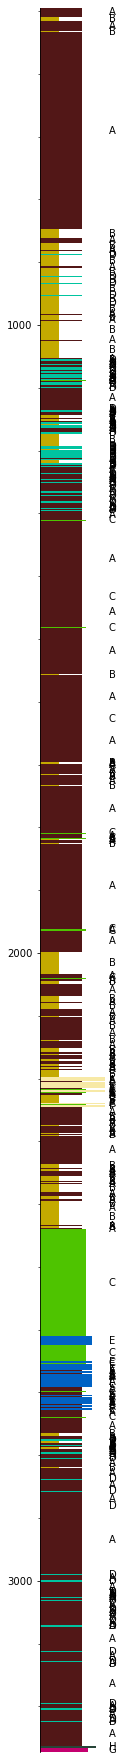

In [13]:
from striplog import Legend

legend_csv = u"""colour, width, component lithology
#521717, 65000, A
#c4aa00, 30000, B
#4ec400, 70000, C
#00c4a0, 65030, D
#0062c4, 80000 , E
#F7E9A6, 99000 , F
#c4006f, 74000 , G
#274538, 86000 , H
"""

legend = Legend.from_csv(text=legend_csv)
s.plot(legend=legend, aspect=17, label='lithology')

In [22]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    12547
30000     2937
70000     1418
65030      708
80000      429
99000      173
74000       41
86000       17
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [26]:
lithology_numbers = {30000: {'lith':'A', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                     65030: {'lith':'B', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                     65000: {'lith':'C', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                     80000: {'lith':'D', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                     74000: {'lith':'E', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                     70000: {'lith':'F', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                     86000: {'lith':'G', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                     99000: {'lith':'H', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'}}


In [30]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'FORCE_2020_LITHOFACIES_LITHOLOGY'


In [31]:
df_lith

,lith,lith_num,hatch,color
FORCE_2020_LITHOFACIES_LITHOLOGY,,,,
30000,A,1,..,#ffff00
65030,B,2,-.,#ffe119
65000,C,3,--,#bebebe
80000,D,4,,#7cfc00
74000,E,5,-/,#8080ff
70000,F,6,+,#80ffff
86000,G,9,,#ff80ff
99000,H,10,||,#ff8c00


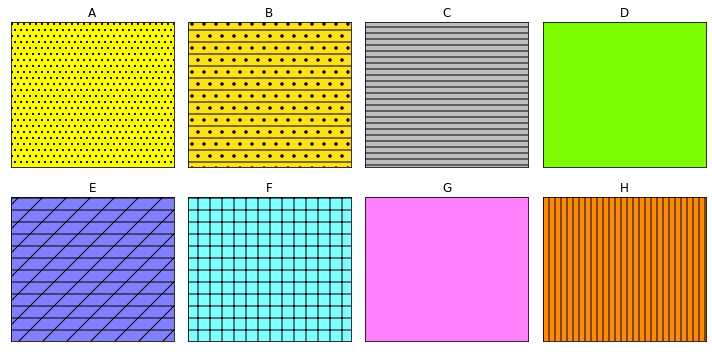

In [33]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=2, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

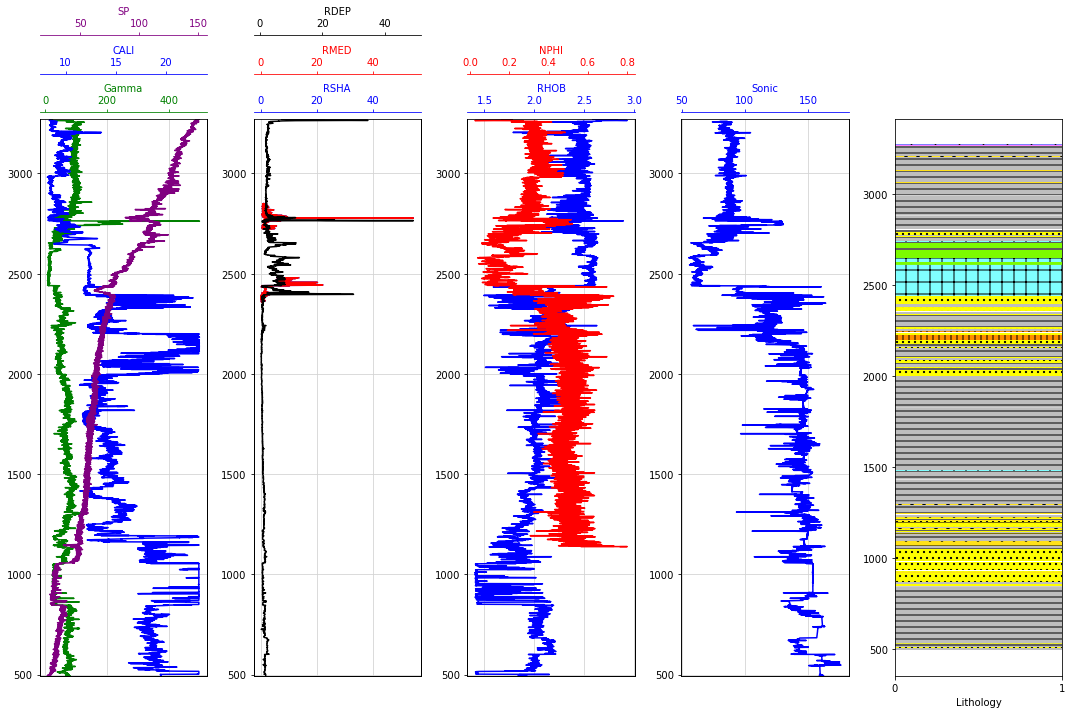

In [207]:

    fig , ax = plt.subplots(figsize=(15 ,10))

    #increase space between graphs
    fig.subplots_adjust(wspace=0.5)


    #Set up the plot axes
    ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)#Gamma ray
    ax2 = ax1.twiny() #Caliper
    ax9 = ax1.twiny() #Caliper
    ax3 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)#RSHA
    ax4 = ax3.twiny()#RMED
    ax5 = ax3.twiny()#RDEP
    ax6 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)#RHOB
    ax7 = ax6.twiny()#NPHI
    ax8 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)#DTC
    ax14 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)#DTC

    #############################################################################################################

    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny() 
    ax10.xaxis.set_visible(False)
    ax11 = ax3.twiny()
    ax11.xaxis.set_visible(False)
    ax12 = ax6.twiny()
    ax12.xaxis.set_visible(False)
    ax13 = ax8.twiny()
    ax13.xaxis.set_visible(False)

    ############################################################################################################

    # Gamma Ray track
    ax1.plot('GR','DEPTH_MD',data = df , color = 'green')
    ax1.set_xlabel("Gamma") # x-label name 
    ax1.xaxis.label.set_color("green") # color of label
    ax1.spines["top"].set_edgecolor("green")  # position and color of line scale 
    ax1.tick_params(axis='x', colors="green") # color of numbers on scale line 


    # Caliper track placed ontop of GR track
    ax2.plot("CALI", "DEPTH_MD", data = df, color = "blue" ,linestyle='-')
    ax2.set_xlabel('CALI')
    ax2.xaxis.label.set_color("blue")
    ax2.spines["top"].set_edgecolor("blue")
    ax2.tick_params(axis='x', colors="blue")
    ax2.spines["top"].set_position(("axes", 1.08))
    ax2.spines["top"].set_visible(True)


    # SP track
    ax9.plot('SP', "DEPTH_MD", data = df, color = "purple")
    ax9.set_xlabel("SP")
    ax9.xaxis.label.set_color("purple")
    ax9.spines["top"].set_edgecolor("purple") 
    ax9.tick_params(axis='x', colors="purple")  
    ax9.spines["top"].set_position(("axes",1.15)) #position and location of axis above curve 
    ax9.spines["top"].set_visible(True) #display axis

    #############################################################################################################

    # RSHA track
    ax3.plot('RSHA','DEPTH_MD',data = df , color = 'blue')
    ax3.set_xlabel("RSHA") # x-label name 
    ax3.xaxis.label.set_color("blue") # color of label
    ax3.spines["top"].set_edgecolor("blue")  # position and color of line scale 
    ax3.tick_params(axis='x', colors="blue") # color of numbers on scale line 


    # RMED track
    ax4.plot('RSHA','DEPTH_MD',data = df , color = 'red')
    ax4.set_xlabel("RMED") # x-label name 
    ax4.xaxis.label.set_color("red") # color of label
    ax4.spines["top"].set_edgecolor("red")  # position and color of line scale 
    ax4.tick_params(axis='x', colors="red") # color of numbers on scale line 
    ax4.spines["top"].set_position(("axes", 1.08))
    ax4.spines["top"].set_visible(True)

   # RDEP track
    ax5.plot('RDEP', "DEPTH_MD", data = df, color = "black")
    ax5.set_xlabel("RDEP")
    ax5.xaxis.label.set_color("black")
    ax5.spines["top"].set_edgecolor("black") 
    ax5.tick_params(axis='x', colors="black")  
    ax5.spines["top"].set_position(("axes",1.15)) #position and location of axis above curve 
    ax5.spines["top"].set_visible(True) #display axis

    ############################################################################################################

    # Density track
    ax6.plot('RHOB','DEPTH_MD',data = df , color = 'blue')
    ax6.set_xlabel("RHOB") # x-label name 
    ax6.xaxis.label.set_color("blue") # color of label
    ax6.spines["top"].set_edgecolor("blue")  # position and color of line scale 
    ax6.tick_params(axis='x', colors="blue") # color of numbers on scale line 


    # NEUTRON  track
    ax7.plot('NPHI','DEPTH_MD',data = df , color = 'red')
    ax7.set_xlabel("NPHI") # x-label name 
    ax7.xaxis.label.set_color("red") # color of label
    ax7.spines["top"].set_edgecolor("red")  # position and color of line scale 
    ax7.tick_params(axis='x', colors="red") # color of numbers on scale line 
    ax7.spines["top"].set_position(("axes", 1.08))
    ax7.spines["top"].set_visible(True)

    ############################################################################################################

    # Sonic track
    ax8.plot(df["DTC"], "DEPTH_MD", data = df, color = "blue")
    ax8.set_xlabel("Sonic")
    ax8.xaxis.label.set_color("blue")
    ax8.spines["top"].set_edgecolor("blue") 
    ax8.tick_params(axis='x', colors="blue")  
    ##############################################################################################################
  # Lithology track
    ax14.plot(df["FORCE_2020_LITHOFACIES_LITHOLOGY"], df['DEPTH_MD'], color = "black", linewidth = 0.5)
    ax14.set_xlabel("Lithology")
    ax14.set_xlim(0, 1)
    ax14.xaxis.label.set_color("black")
    ax14.tick_params(axis='x', colors="black")
    ax14.spines["top"].set_edgecolor("black")

    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax14.fill_betweenx(df['DEPTH_MD'], 0, df['FORCE_2020_LITHOFACIES_LITHOLOGY'], where=(df['FORCE_2020_LITHOFACIES_LITHOLOGY']==key),
                         facecolor=color, hatch=hatch) 
        ax14.set_xticks([0, 1])


    for ax in [ax1, ax3,ax6,ax8]:
        ax.set_ylim(df['DEPTH_MD'].min(), df['DEPTH_MD'].max()) # scale of depth to all curves
        ax.grid(which='major', color='lightgrey', linestyle='-')# shape and color of grid to all curves 
        ax.xaxis.set_ticks_position("top") 
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.01235)) # distance between (scale line) and graphs 
    
    plt.tight_layout()

## Q3 - How many classes in the facies log.


In [54]:
classes = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].nunique()
print(f'Number of classes in facies log = {classes}')

Number of classes in facies log = 8


## Q4. How many data points per each class


In [71]:
for x in df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique():
    print(f'Data point of class {x} is {(df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == x).sum()}')

Data point of class 65000 is 12547
Data point of class 30000 is 2937
Data point of class 65030 is 708
Data point of class 70000 is 1418
Data point of class 99000 is 173
Data point of class 80000 is 429
Data point of class 86000 is 17
Data point of class 74000 is 41


# Day 10 : Data Loading and Manipulation and Visulatiozation (Facies)
## You can use the following liberaries for your assignment:
>Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Create subset including (DT, NPHI, GR,SP) logs
3. Create a function to Normalize the well logs using formula (X-Xmin / Xmax-Xmin).
4. Create a function to Standarize the well logs using formula (X-mean / standard deviation).
5. Plot histogram of the normalized and standarized well logs.

In [170]:
df = pd.read_csv('well1513.csv')

In [171]:
subset = df[['DTC','NPHI','GR','SP']]

In [172]:
subset

,DTC,NPHI,GR,SP
0,161.131180,NaN,80.200851,24.612379
1,160.603470,NaN,79.262886,23.895531
2,160.173615,NaN,74.821999,23.916357
3,160.149429,NaN,72.878922,23.793688
4,160.128342,NaN,71.729141,24.104078
...,...,...,...,...
18265,NaN,0.187811,19.418915,151.198853
18266,NaN,0.185574,21.444370,150.976990
18267,NaN,0.176074,22.646879,151.109222
18268,NaN,0.174617,22.253584,150.753235


## Distribution of Data before making normalize and standarize
>>The main goal of these techniques is to make sure that all variables are on the same scale between (0 and 1)

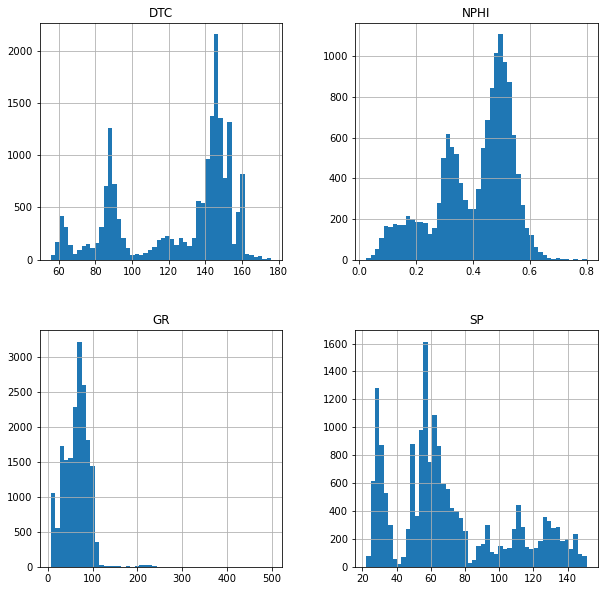

In [146]:
subset.hist(bins=50,figsize=(10,10))
plt.show()

# Q3- Create a function to Normalize the well logs using formula (X-Xmin / Xmax-Xmin).

### Normalization is the process of scaling a variable to have a values between 0 and 1. It is typically used for scaling the values of variables that have different units or scales. This is done by subtracting the minimum value of the variable from all the observations, and then dividing by the range (i.e. the difference between the maximum and minimum values).

In [173]:
# take copy from original data
subset_n = subset.copy()

In [174]:
for normalize in subset_n.columns:
    min_value = subset[normalize].min()
    range_value = subset[normalize].max() - min_value
    subset_n[normalize] = (subset[normalize] - min_value) / range_value

In [175]:
subset_n # All values between 0 and 1

,DTC,NPHI,GR,SP
0,0.876716,NaN,0.150172,0.018978
1,0.872327,NaN,0.148269,0.013423
2,0.868752,NaN,0.139258,0.013584
3,0.868550,NaN,0.135315,0.012633
4,0.868375,NaN,0.132982,0.015039
...,...,...,...,...
18265,NaN,0.210689,0.026840,1.000000
18266,NaN,0.207807,0.030949,0.998281
18267,NaN,0.195563,0.033389,0.999305
18268,NaN,0.193686,0.032591,0.996547


# 4. Create a function to Standarize the well logs using formula (X-mean / standard deviation).


### Standardization is the process of transforming a variable to have a mean of 0 and a standard deviation of 1.. This is done by subtracting the mean of the variable from all observations, and then dividing by the standard deviation.

In [176]:
#copy from original data
subset_s = subset.copy()

In [181]:
for standarize in subset_s.columns:
    mean = subset_s[standarize].mean()
    std_div = subset_s[standarize].std()
    subset_s[standarize] = subset_s[standarize]-mean/std_div

In [185]:
subset_s

,DTC,NPHI,GR,SP
0,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
1,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
2,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
3,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
4,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
...,...,...,...,...
18265,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
18266,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
18267,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14
18268,-2.014137e+12,-4.119471e+12,-2.008187e+13,-1.569890e+14


## 5. Plot histogram of the normalized and standarized well logs.

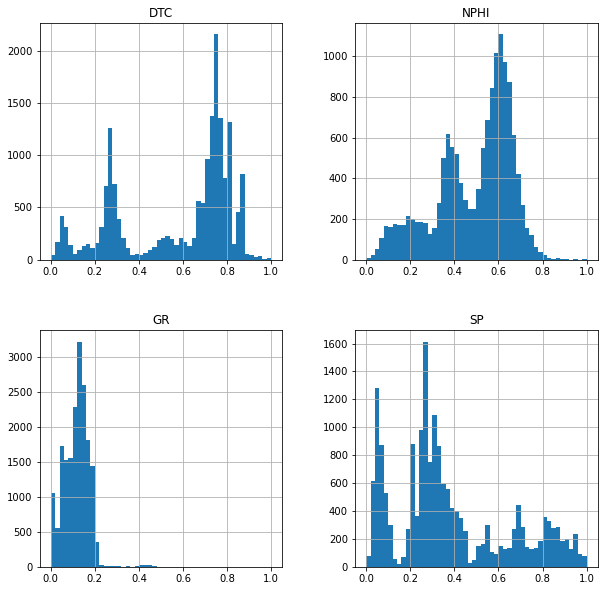

In [186]:
# normalization histogram
subset_n.hist(bins=50,figsize=(10,10))
plt.show()

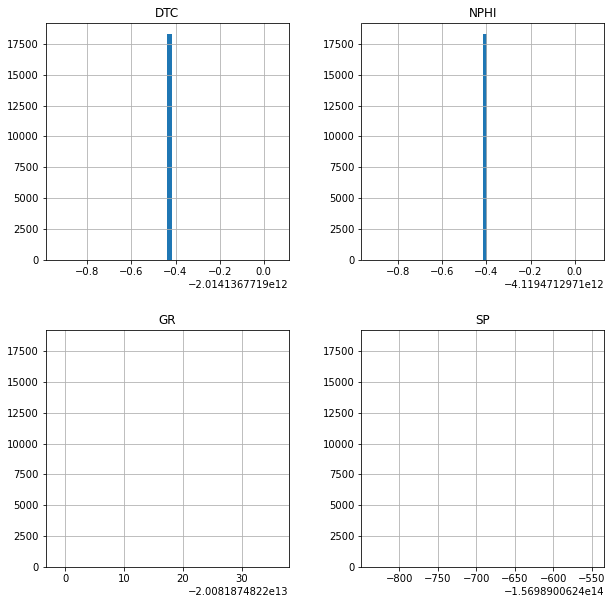

In [187]:
# standarization histogram
subset_s.hist(bins=50,figsize=(10,10))
plt.show()

## we can aslo make normalization by using sklearn library 

In [200]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.fit_transform(subset)

subset_normalized = scaler.fit_transform(subset)



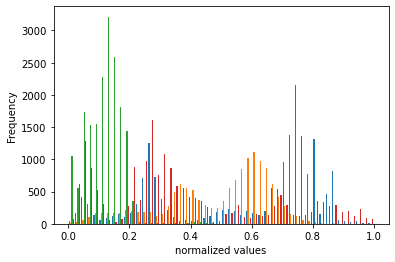

In [203]:
plt.hist(subset_normalized, bins=50)

# Add labels and show the plot
plt.xlabel('normalized values')
plt.ylabel('Frequency')
plt.show()

In [201]:
#import library
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
# Fit the scaler to your dataset
scaler.fit_transform(subset)

# Transform the dataset
subset_standardized = scaler.transform(subset)

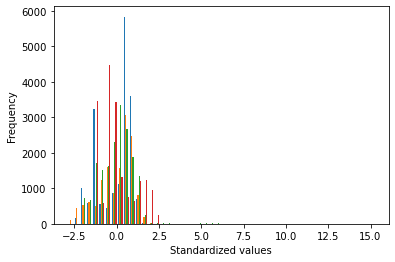

In [202]:
plt.hist(subset_standardized, bins=50)

# Add labels and show the plot
plt.xlabel('Standardized values')
plt.ylabel('Frequency')
plt.show()